<a href="http://www.louisville.edu"><img src = "https://scontent-ort2-2.xx.fbcdn.net/v/t1.6435-9/185393772_10157730198765899_6137133964003342304_n.jpg?_nc_cat=102&ccb=1-5&_nc_sid=6e5ad9&_nc_ohc=nhwGx_CPtF0AX-k_sR4&_nc_ht=scontent-ort2-2.xx&oh=00_AT9-NHyX-MdiUHq34g-aG-Cj16o8N4e1oJyIRb0ZiKdD2Q&oe=61F8FC7B" width = 400> </a>

<h1 align=center><font size = 5>CSE 590 Data Visualization</font></h1>
<h1 align=center><font size = 5> HW1 - Data visualization basic skills - area plots, histograms, and bar plots</font></h1>
<h1 align=center><font size = 5> Due time - Jan. 27th </font></h1>


# Exploring Datasets with *pandas* and Matplotlib<a id="0"></a>

In this homework, we will use Matplotlib library, together with Numpy and/or Pandas to create plots.

Toolkits: As we introcued in our lectures, please use [*pandas*](http://pandas.pydata.org/) and [**Numpy**](http://www.numpy.org/) for data wrangling, analysis, and visualization. The primary plotting library that we are exploring in the course is [Matplotlib](http://matplotlib.org/).

Dataset: Immigration to USA from 1980 to 2013. 

## Table of Contents

<div class="alert alert-block alert-info" style="margin-top: 20px">

1. [Accessing Data](#2)<br>
2. [Visualizing Data using Matplotlib](#4) <br>
3. [Area Plots](#6) <br>
4. [Bar Plots](#8) <br>
5. [Pie Charts](#10) <br>
</div>
<hr>

# Accessing Data <a id="2"></a>

Import Primary Modules. The first thing we'll do is import two key data analysis modules: *pandas* and **Numpy**.

In [2]:
import numpy as np  # useful for many scientific computing in Python
import pandas as pd # primary data structure library

Access the dataset and read it into a *pandas* dataframe.

In [3]:
df_usa = pd.read_csv('USA.csv', engine='python', encoding ="ISO-8859-1" )

print('Data downloaded and read into a dataframe!')

Data downloaded and read into a dataframe!


Let's take a look at the first five items in our dataset.

In [4]:
df_usa.head(5)

,Type,Coverage,Country,AREA,Continent,REG,Region,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Less developed regions,722,...,2137,4749,3417,1753,2813,3165,2017,1648,1617,2196
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,More developed regions,30,...,3840,5947,7914,5737,5754,5137,4711,3612,3364,3186
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Less developed regions,175,...,805,1115,1300,1036,1037,1485,1305,1364,1369,1241
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Less developed regions,0,...,12,15,28,11,14,19,14,D,-,D
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,More developed regions,2,...,..,..,..,..,..,..,..,..,..,..


Let's find out how many entries there are in our dataset.

In [5]:
# print the dimensions of the dataframe
print(df_usa.shape)

(214, 43)


Clean up data. We will make some modifications to the original dataset to make it easier to create our visualizations. Refer to `Introduction to Matplotlib and Line Plots` lab for the rational and detailed description of the changes.

#### 1. Clean up the dataset to remove columns that are not informative to us for visualization (eg. Type, AREA, REG).

In [6]:
df_usa.drop(['AREA', 'REG', 'DEV', 'Type', 'Coverage'], axis=1, inplace=True)

# let's view the first five elements and see how the dataframe was changed
df_usa.head(5)

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,Less developed regions,722,1881,1569,2566,3222,2794,...,2137,4749,3417,1753,2813,3165,2017,1648,1617,2196
1,Albania,Europe,Southern Europe,More developed regions,30,11,23,22,32,45,...,3840,5947,7914,5737,5754,5137,4711,3612,3364,3186
2,Algeria,Africa,Northern Africa,Less developed regions,175,184,190,201,197,202,...,805,1115,1300,1036,1037,1485,1305,1364,1369,1241
3,American Samoa,Oceania,Polynesia,Less developed regions,0,0,7,7,0,0,...,12,15,28,11,14,19,14,D,-,D
4,Andorra,Europe,Southern Europe,More developed regions,2,3,2,1,0,0,...,..,..,..,..,..,..,..,..,..,..


Notice how the columns Type, Coverage, AREA, REG, and DEV got removed from the dataframe.

#### 2. For consistency, ensure that all column labels of type string.

In [7]:
# let's examine the types of the column labels
all(isinstance(column, str) for column in df_usa.columns)

True

Notice how the above line of code returned *False* when we tested if all the column labels are of type **string**. So let's change them all to **string** type.

In [8]:
df_usa.columns = list(map(str, df_usa.columns))

# let's check the column labels types now
all(isinstance(column, str) for column in df_usa.columns)

True

#### 3. Set the country name as index - useful for quickly looking up countries using .loc method.

In [9]:
df_usa.set_index('Country', inplace=True)

# let's view the first five elements and see how the dataframe was changed
df_usa.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Less developed regions,722,1881,1569,2566,3222,2794,2831,...,2137,4749,3417,1753,2813,3165,2017,1648,1617,2196
Albania,Europe,Southern Europe,More developed regions,30,11,23,22,32,45,53,...,3840,5947,7914,5737,5754,5137,4711,3612,3364,3186
Algeria,Africa,Northern Africa,Less developed regions,175,184,190,201,197,202,183,...,805,1115,1300,1036,1037,1485,1305,1364,1369,1241
American Samoa,Oceania,Polynesia,Less developed regions,0,0,7,7,0,0,0,...,12,15,28,11,14,19,14,D,-,D
Andorra,Europe,Southern Europe,More developed regions,2,3,2,1,0,0,1,...,..,..,..,..,..,..,..,..,..,..


Notice how the country names now serve as indices.

#### 4. Clean up the obove dataframe - to do: turn non-numeric cells in years 1980-2013 to 0 or NAN

In [10]:
for column in df_usa.columns:
    if((column != 'Continent') and (column !='Region') and (column !='DevName')):
        df_usa[column] = pd.to_numeric(df_usa[column], errors = 'coerce').fillna(0).astype('int')
df_usa.head()


,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Less developed regions,722,1881,1569,2566,3222,2794,2831,...,2137,4749,3417,1753,2813,3165,2017,1648,1617,2196
Albania,Europe,Southern Europe,More developed regions,30,11,23,22,32,45,53,...,3840,5947,7914,5737,5754,5137,4711,3612,3364,3186
Algeria,Africa,Northern Africa,Less developed regions,175,184,190,201,197,202,183,...,805,1115,1300,1036,1037,1485,1305,1364,1369,1241
American Samoa,Oceania,Polynesia,Less developed regions,0,0,7,7,0,0,0,...,12,15,28,11,14,19,14,0,0,0
Andorra,Europe,Southern Europe,More developed regions,2,3,2,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0


#### 5. Add a "total" column at the end of the datatrame

In [59]:
df_usa['Total'] = df_usa.sum(axis=1, skipna = True)
df_usa.head(213)

C:\Users\laure\AppData\Local\Temp/ipykernel_14800/2756581866.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_usa['Total'] = df_usa.sum(axis=1, skipna = True)


,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Less developed regions,722,1881,1569,2566,3222,2794,2831,...,4749,3417,1753,2813,3165,2017,1648,1617,2196,148860
Albania,Europe,Southern Europe,More developed regions,30,11,23,22,32,45,53,...,5947,7914,5737,5754,5137,4711,3612,3364,3186,174760
Algeria,Africa,Northern Africa,Less developed regions,175,184,190,201,197,202,183,...,1115,1300,1036,1037,1485,1305,1364,1369,1241,46562
American Samoa,Oceania,Polynesia,Less developed regions,0,0,7,7,0,0,0,...,15,28,11,14,19,14,0,0,0,440
Andorra,Europe,Southern Europe,More developed regions,2,3,2,1,0,0,1,...,0,0,0,0,0,0,0,0,0,36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Western Sahara,Africa,Northern Africa,Less developed regions,0,1,1,2,0,0,0,...,0,0,0,0,0,0,0,0,0,10
Yemen,Asia,Western Asia,Less developed regions,160,230,305,268,324,432,420,...,3366,4308,2396,1872,3134,3591,3361,2620,3532,112208
Zambia,Africa,Eastern Africa,Less developed regions,178,165,165,160,146,169,168,...,499,672,576,613,704,628,652,643,505,21666


Now the dataframe has an extra column that presents the total number of immigrants from each country in the dataset from 1980 - 2013. So if we print the dimension of the data, we get:

In [12]:
# finally, let's create a list of years from 1980 - 2013
# this will come in handy when we start plotting the data
years = list(map(str, range(1980, 2014)))

years

['1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013']

# Visualizing Data using Matplotlib<a id="4"></a>

Import `Matplotlib` and **Numpy**.

In [13]:
# use the inline backend to generate the plots within the browser
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0

Matplotlib version:  3.4.3


# Area Plots of immigration from top 5 countries in 1980-2013<a id="6"></a>

Leveraging the new "total" column in your dataframe, please visualize the top 5 countries that contributed the most immigrants to USA from 1980 to 2013. Please use **Stacked Line Plot** or **Area plot** for this visualization.

Reference: [Area plot using pandas dataframe] https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.area.html


In [14]:
# add your implementation here


# Bar Charts of immigrations from all countries in 2013 <a id="10"></a>

A bar plot is a way of representing data where the *length* of the bars represents the magnitude/size of the feature/variable. Bar graphs usually represent numerical and categorical variables grouped in intervals. Please use bar charts to visualize how all the countries contributed immigrants to USA in 2013.

Reference: [Bar plot using pandas dataframe] https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.bar.html

In [15]:
# add your implementation here

# Pie Charts of accumulated immigrations from all countries <a id="10"></a>

A pie chart is a circular statistical graphic, which is divided into slices to illustrate numerical proportion. In a pie chart, the arc length of each slice, is proportional to the quantity it represents. 

Reference: [Pie plot using pandas dataframe] https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.pie.html

<function matplotlib.pyplot.show(close=None, block=None)>

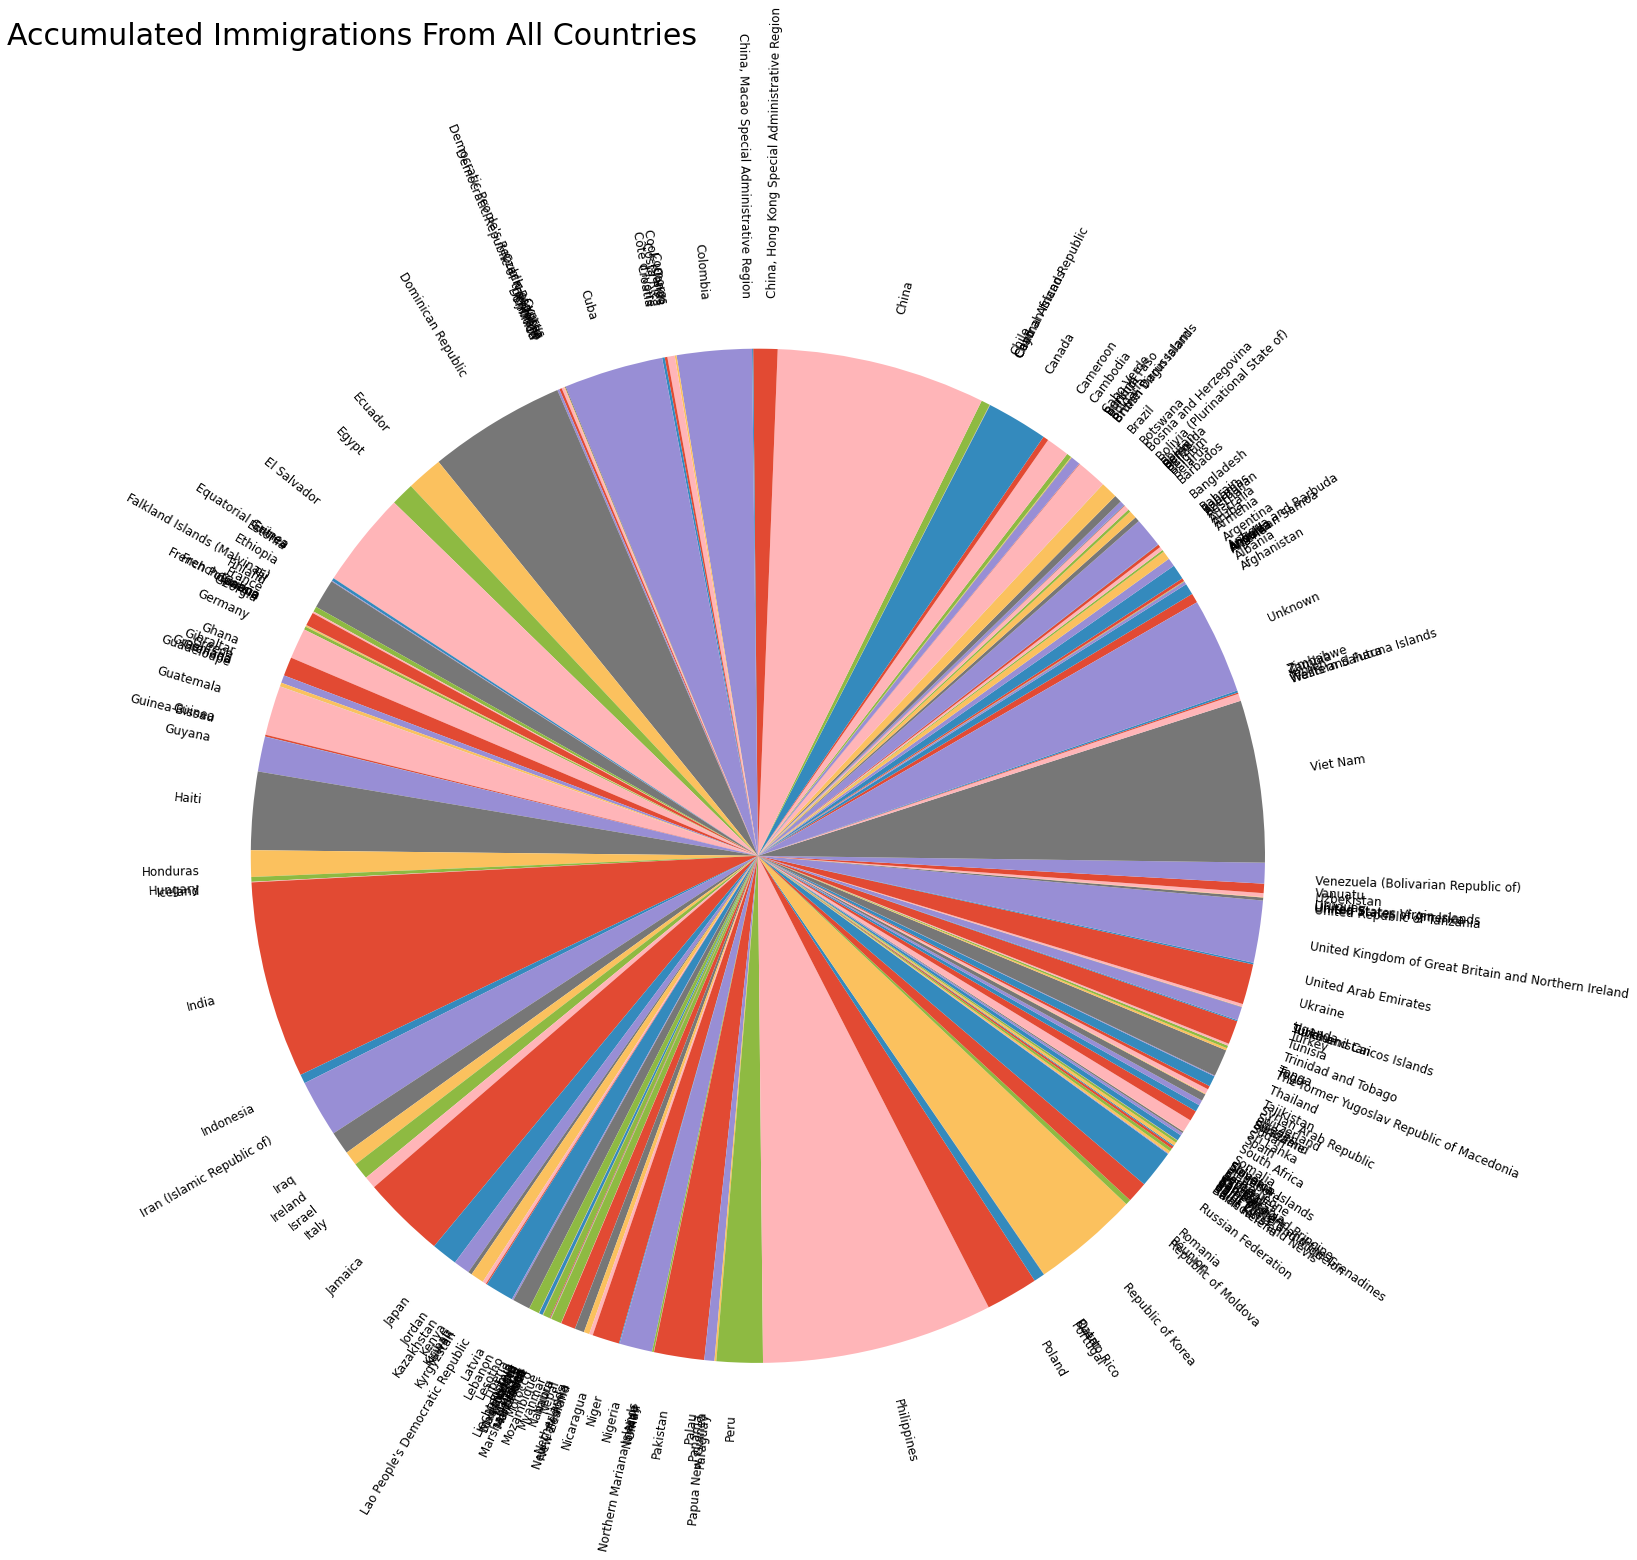

In [94]:

labels = df_usa.index[:-1]
data = df_usa['Total'][:-1]
 
fig, pieChart = plt.subplots(figsize= (20,20)) 

pieChart.pie(sizes,labels=labels,startangle = 30, rotatelabels=True, textprops={'fontsize': 12})


title = "Accumulated Immigrations From All Countries"
plt.text(-0.8, 1.6,title, horizontalalignment='center', fontsize=30)


pieChart.axis('equal')  
plt.show
